In [1]:
import os
import pandas as pd
import numpy as np

### Importing Data

In [2]:
filename = [os.path.join(os.path.dirname(os.getcwd()),file) for file in os.listdir(
    os.path.dirname(os.getcwd())) if file.startswith('data')][0]

In [3]:
data = pd.ExcelFile(filename , engine='openpyxl')
names = data.sheet_names
names

['Forecasted Consumption', 'Meter List', 'Rates']

##### Importing Forecasted Consumption

In [4]:
df1 = pd.read_excel(filename , engine = 'openpyxl',sheet_name = names[0])
df1.head()

,Date,Meter ID,kWh
0,2020-10-01,1000000603,28.782474
1,2020-10-01,10588707,126.367711
2,2020-10-01,10626610,326.240595
3,2020-10-02,1000000603,26.690797
4,2020-10-02,10588707,118.322449


In [5]:
df1['Meter ID'
].unique()

array([1000000603,   10588707,   10626610], dtype=int64)

#### Importing Meter List

In [6]:
df2 = pd.read_excel(filename , engine = 'openpyxl' , sheet_name = names[1])

In [7]:
df2

,Meter ID,Exit Zone,Annual Quantity (kWh)
0,1000000603,SC1,12337
1,10588707,EM2,75123
2,10626610,NW1,151779


##### Importing Exit Zone - Rate (p/kWh) Table

In [8]:
df3 = pd.read_excel(filename , engine = 'openpyxl' , sheet_name = names[2])
df3

,Date,Exit Zone,Annual Quantity (Min),Annual Quantity (Max),Rate (p/kWh)
0,2020-04-01,EA1,0,73200.0,0.028700
1,2020-04-01,EA2,0,73200.0,0.028700
2,2020-04-01,EA3,0,73200.0,0.028700
3,2020-04-01,EA4,0,73200.0,0.028700
4,2020-04-01,EM1,0,73200.0,0.028700
...,...,...,...,...,...
1021,2024-04-01,WA1,732000,NaN,0.384755
1022,2024-04-01,WA2,732000,NaN,0.384755
1023,2024-04-01,WM1,732000,NaN,0.445482
1024,2024-04-01,WM2,732000,NaN,0.445482


In [9]:
df3.columns

Index(['Date', 'Exit Zone', 'Annual Quantity (Min)', 'Annual Quantity (Max)',
       'Rate (p/kWh)'],
      dtype='object')

In [10]:
df3.rename(columns = {'Annual Quantity (Min)':'AQ(MIN)','Annual Quantity (Max)':'AQ(MAX)'},inplace=True)
df3.head()

,Date,Exit Zone,AQ(MIN),AQ(MAX),Rate (p/kWh)
0,2020-04-01,EA1,0,73200.0,0.0287
1,2020-04-01,EA2,0,73200.0,0.0287
2,2020-04-01,EA3,0,73200.0,0.0287
3,2020-04-01,EA4,0,73200.0,0.0287
4,2020-04-01,EM1,0,73200.0,0.0287


### Data Wrangling (dropping NaN)

In [11]:
dfs = [df1,df2,df3]
dfs = {names[i]:df for i , df in enumerate(dfs)}
for sheet_name , df  in dfs.items():
    if df.isnull().values.any():
        print(f'NaN values detected in dataframe {sheet_name}.')
        print('Printing NaN rows............')
        print('*'*80)
        print(df[df.isna().any(axis=1)])
        print()

NaN values detected in dataframe Rates.
Printing NaN rows............
********************************************************************************
           Date Exit Zone  AQ(MIN)  AQ(MAX)  Rate (p/kWh)
76   2020-04-01       EA1   732000      NaN      0.182000
77   2020-04-01       EA2   732000      NaN      0.182000
78   2020-04-01       EA3   732000      NaN      0.182000
79   2020-04-01       EA4   732000      NaN      0.182000
80   2020-04-01       EM1   732000      NaN      0.182000
...         ...       ...      ...      ...           ...
1021 2024-04-01       WA1   732000      NaN      0.384755
1022 2024-04-01       WA2   732000      NaN      0.384755
1023 2024-04-01       WM1   732000      NaN      0.445482
1024 2024-04-01       WM2   732000      NaN      0.445482
1025 2024-04-01       WM3   732000      NaN      0.445482

[342 rows x 5 columns]



In [12]:
df3.dropna(axis=0,inplace=True)

In [13]:
###CHECKING IF NaN Values are Dropped
df3[df3.isna().any(axis=1)]

,Date,Exit Zone,AQ(MIN),AQ(MAX),Rate (p/kWh)


In [14]:
df3.reset_index(inplace=True)

In [15]:
#### dtypes for dataframes
for sheet_name , df in dfs.items():
    print(f'Printing dtypes for {sheet_name}....')
    print('*'*80)
    print(df.dtypes)
    print('\n')

Printing dtypes for Forecasted Consumption....
********************************************************************************
Date        datetime64[ns]
Meter ID             int64
kWh                float64
dtype: object


Printing dtypes for Meter List....
********************************************************************************
Meter ID                  int64
Exit Zone                object
Annual Quantity (kWh)     int64
dtype: object


Printing dtypes for Rates....
********************************************************************************
index                    int64
Date            datetime64[ns]
Exit Zone               object
AQ(MIN)                  int64
AQ(MAX)                float64
Rate (p/kWh)           float64
dtype: object




In [16]:
####Describing dataframes
for sheet_name , df in dfs.items():
    print(f'Dataframe description for {sheet_name}....')
    print('*'*80)
    print(df.describe())
    print('\n')

Dataframe description for Forecasted Consumption....
********************************************************************************
           Meter ID          kWh
count  2.190000e+03  2190.000000
mean   3.404053e+08   205.790868
std    4.665108e+08   202.490709
min    1.058871e+07     8.024519
25%    1.058871e+07    43.567133
50%    1.062661e+07   160.791670
75%    1.000001e+09   306.162471
max    1.000001e+09   735.103232


Dataframe description for Meter List....
********************************************************************************
           Meter ID  Annual Quantity (kWh)
count  3.000000e+00               3.000000
mean   3.404053e+08           79746.333333
std    5.712263e+08           69835.873656
min    1.058871e+07           12337.000000
25%    1.060766e+07           43730.000000
50%    1.062661e+07           75123.000000
75%    5.053136e+08          113451.000000
max    1.000001e+09          151779.000000


Dataframe description for Rates....
********************

In [17]:
###printing all meters and exit zones
df2

,Meter ID,Exit Zone,Annual Quantity (kWh)
0,1000000603,SC1,12337
1,10588707,EM2,75123
2,10626610,NW1,151779


In [18]:
all_meters = df2['Meter ID'].unique()
exit_zones = df2['Exit Zone'].unique()
print('Meters')
print(all_meters)
print()
print('Exit Zones')
print(exit_zones)

Meters
[1000000603   10588707   10626610]

Exit Zones
['SC1' 'EM2' 'NW1']


In [19]:
m_id = 10588707
df2[df2['Meter ID'] == m_id]

,Meter ID,Exit Zone,Annual Quantity (kWh)
1,10588707,EM2,75123


In [20]:
df3[df3['Exit Zone'].isin(exit_zones)]

,index,Date,Exit Zone,AQ(MIN),AQ(MAX),Rate (p/kWh)
5,5,2020-04-01,EM2,0,73200.0,0.028700
21,21,2020-04-01,NW1,0,73200.0,0.033900
23,23,2020-04-01,SC1,0,73200.0,0.033300
43,43,2020-04-01,EM2,73200,732000.0,0.022800
59,59,2020-04-01,NW1,73200,732000.0,0.028500
61,61,2020-04-01,SC1,73200,732000.0,0.029700
81,119,2020-10-01,EM2,0,73200.0,0.028700
97,135,2020-10-01,NW1,0,73200.0,0.033900
99,137,2020-10-01,SC1,0,73200.0,0.033300
119,157,2020-10-01,EM2,73200,732000.0,0.022800


In [21]:
df3[df3['Exit Zone'] == 'EM2']

,index,Date,Exit Zone,AQ(MIN),AQ(MAX),Rate (p/kWh)
5,5,2020-04-01,EM2,0,73200.0,0.028700
43,43,2020-04-01,EM2,73200,732000.0,0.022800
81,119,2020-10-01,EM2,0,73200.0,0.028700
119,157,2020-10-01,EM2,73200,732000.0,0.022800
157,233,2021-04-01,EM2,0,73200.0,0.029405
195,271,2021-04-01,EM2,73200,732000.0,0.023360
233,347,2021-10-01,EM2,0,73200.0,0.029405
271,385,2021-10-01,EM2,73200,732000.0,0.023360
309,461,2022-04-01,EM2,0,73200.0,0.030661
347,499,2022-04-01,EM2,73200,732000.0,0.024358


In [57]:
df4[df4['Meter ID'] == 10588707]

,Date,Meter ID,kWh,Exit Zone,Annual Quantity (kWh),Rate (p/kWh),Cost,Cost(£)
730,2020-10-01,10588707,126.367711,EM2,75123,0.022800,2.881184,0.028812
731,2020-10-02,10588707,118.322449,EM2,75123,0.022800,2.697752,0.026978
732,2020-10-03,10588707,94.272125,EM2,75123,0.022800,2.149404,0.021494
733,2020-10-04,10588707,97.641038,EM2,75123,0.022800,2.226216,0.022262
734,2020-10-05,10588707,138.761245,EM2,75123,0.022800,3.163756,0.031638
...,...,...,...,...,...,...,...,...
1455,2022-09-26,10588707,73.614794,EM2,75123,0.024358,1.793098,0.017931
1456,2022-09-27,10588707,75.116336,EM2,75123,0.024358,1.829673,0.018297
1457,2022-09-28,10588707,76.430689,EM2,75123,0.024358,1.861687,0.018617
1458,2022-09-29,10588707,77.744203,EM2,75123,0.024358,1.893682,0.018937


In [22]:
###JOINING FORECASTED CONSUMPTION AND METER DATAFRAMES
df4 = pd.merge(df1,df2)
df4.head()

,Date,Meter ID,kWh,Exit Zone,Annual Quantity (kWh)
0,2020-10-01,1000000603,28.782474,SC1,12337
1,2020-10-02,1000000603,26.690797,SC1,12337
2,2020-10-03,1000000603,21.511312,SC1,12337
3,2020-10-04,1000000603,22.801972,SC1,12337
4,2020-10-05,1000000603,30.805517,SC1,12337


### Data Visualization

In [23]:
import matplotlib.pyplot as plt
import scipy.stats
plt.style.use('seaborn')
%matplotlib inline
color = lambda : list(np.random.random(size=3))

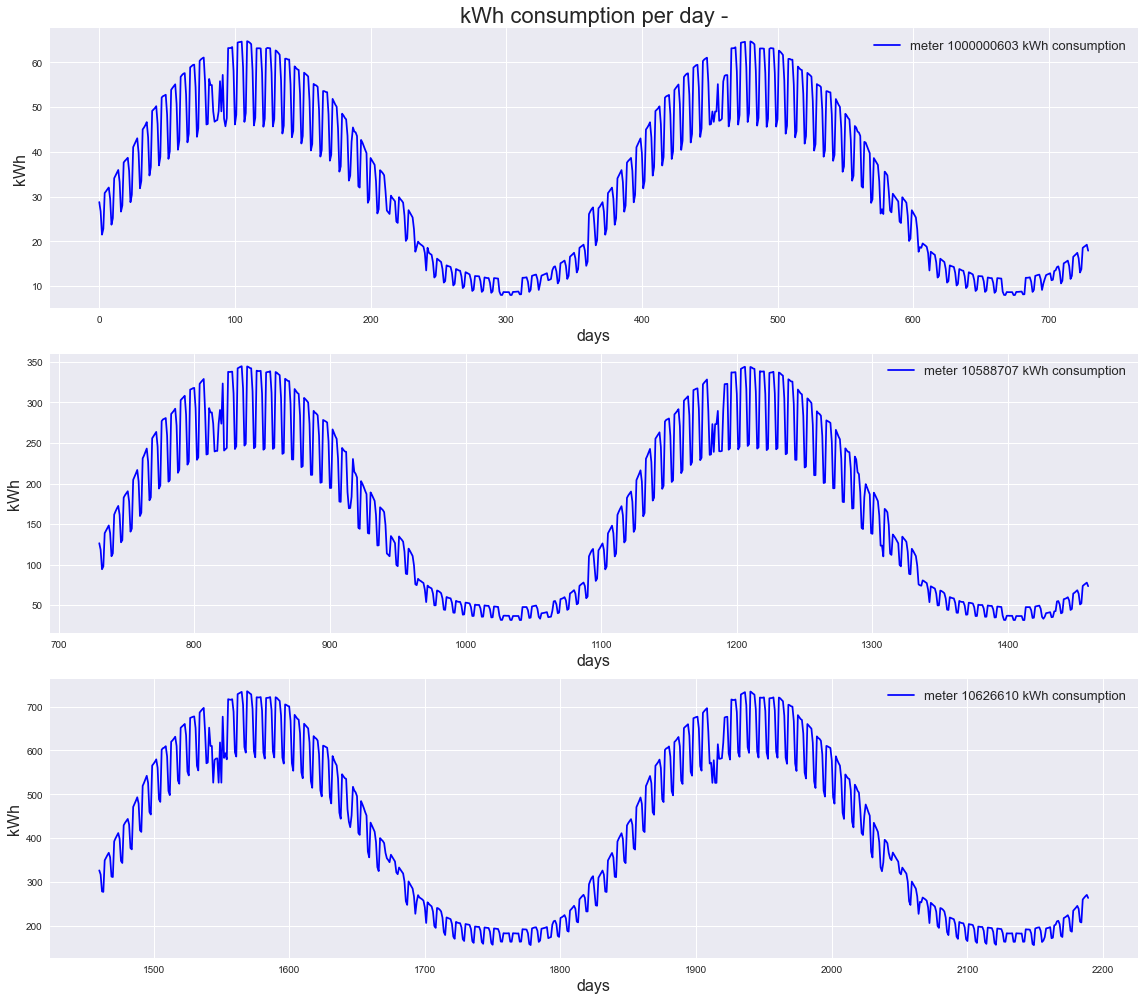

In [24]:
fig , (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(16,14))
axes = [ax1,ax2,ax3]
for i , meter in enumerate(df4['Meter ID'].unique()):
    new_df = df4[df4['Meter ID'] == meter]['kWh']
    new_df.reset_index()
    axes[i].plot(new_df,label = f'meter {meter} kWh consumption',color='blue')
    axes[i].set_xlabel('days')
    axes[i].set_ylabel('kWh')
    axes[i].xaxis.label.set_size('16')
    axes[i].yaxis.label.set_size('16')
    if i==0: 
        axes[i].set_title('kWh consumption per day -')
        axes[i].title.set_size('22')
    axes[i].legend(loc=0,prop={'size':13})
fig.tight_layout()

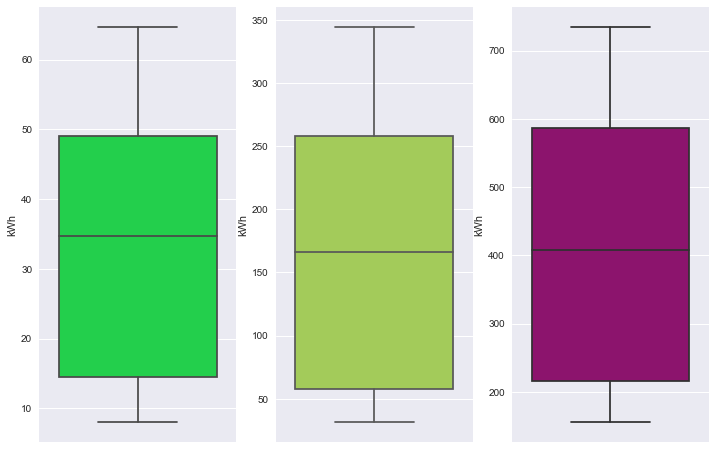

In [25]:
###boxplots for the three different meters
import seaborn as sn
import random
fig , (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(12,8))
axes = (ax1,ax2,ax3)
for i , meter in enumerate(df4['Meter ID'].unique()):
    sn.boxplot(y = 'kWh',data = df4[df4['Meter ID'] == meter] , ax = axes[i] , color = color())

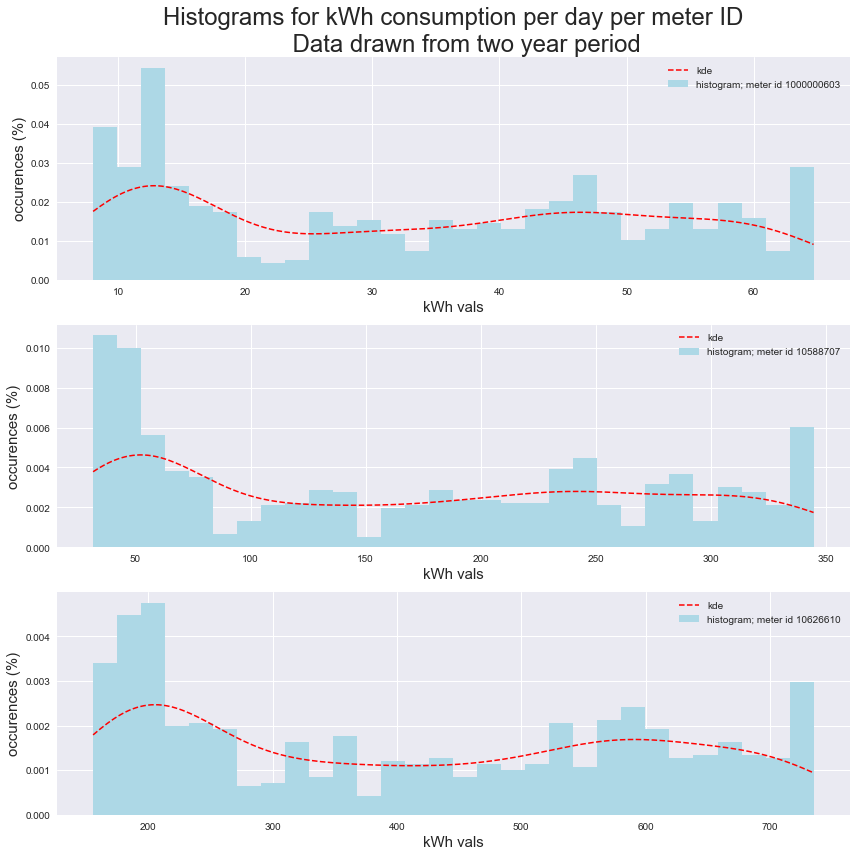

In [26]:
fig , (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(12,12))
axes = [ax1,ax2,ax3]
for i , meter in enumerate(df4['Meter ID'].unique()):
    data = df4[df4['Meter ID'] == meter]['kWh'].copy()
    density = scipy.stats.gaussian_kde(data)
    xs = np.linspace(data.min(),data.max(),200)
    axes[i].hist(data,density=True,bins=30,label=f'histogram; meter id {meter}',color='lightblue')
    axes[i].plot(xs,density(xs),linestyle='--',lw=1.5,label=f'kde',color='red')
    if i==0: axes[i].set_title('''Histograms for kWh consumption per day per meter ID
    Data drawn from two year period''')
    axes[i].set_xlabel('kWh vals')
    axes[i].set_ylabel('occurences (%)')
    axes[i].xaxis.label.set_size('15')
    axes[i].yaxis.label.set_size('15')
    axes[i].title.set_size('24')
    axes[i].legend(loc=0)
fig.tight_layout()

## Task 1
##### Total Consumption/Cost per Meter

In [27]:
df3['AQ(MIN)'].unique()

array([    0, 73200], dtype=int64)

In [28]:
df3['AQ(MAX)'].unique()

array([ 73200., 732000.])

In [29]:
def fetch_rate(x,rate_df):
    if x[-1] < 73200.0: ##AQ MIN INCLUDED
        new_df = rate_df.loc[(rate_df['Exit Zone'] == x[1]) & 
                             (rate_df['AQ(MIN)'] == 0.0) & 
                             (rate_df['Date'] <= x[0])]
    else:
        new_df = rate_df.loc[(rate_df['Exit Zone'] == x[1]) & 
                             (rate_df['AQ(MIN)'] == 73200.0) &
                             (rate_df['Date'] <= x[0])]
    return new_df['Rate (p/kWh)'].iloc[-1]

In [30]:
import time

In [31]:
tik = time.perf_counter()
df4['Rate (p/kWh)'] = df4[['Date','Exit Zone','Annual Quantity (kWh)']].apply(
    lambda x:fetch_rate(x,df3),axis=1)
df4['Cost'] = df4['Rate (p/kWh)']*df4['kWh']
tak = time.perf_counter()
print('Process completed in {:1.5f} second(s).'.format(round(tak-tik,3)))
df4.head()

Process completed in 1.80100 second(s).


,Date,Meter ID,kWh,Exit Zone,Annual Quantity (kWh),Rate (p/kWh),Cost
0,2020-10-01,1000000603,28.782474,SC1,12337,0.0333,0.958456
1,2020-10-02,1000000603,26.690797,SC1,12337,0.0333,0.888804
2,2020-10-03,1000000603,21.511312,SC1,12337,0.0333,0.716327
3,2020-10-04,1000000603,22.801972,SC1,12337,0.0333,0.759306
4,2020-10-05,1000000603,30.805517,SC1,12337,0.0333,1.025824


In [32]:
df4[df4['Meter ID'] == 10588707]

,Date,Meter ID,kWh,Exit Zone,Annual Quantity (kWh),Rate (p/kWh),Cost
730,2020-10-01,10588707,126.367711,EM2,75123,0.022800,2.881184
731,2020-10-02,10588707,118.322449,EM2,75123,0.022800,2.697752
732,2020-10-03,10588707,94.272125,EM2,75123,0.022800,2.149404
733,2020-10-04,10588707,97.641038,EM2,75123,0.022800,2.226216
734,2020-10-05,10588707,138.761245,EM2,75123,0.022800,3.163756
...,...,...,...,...,...,...,...
1455,2022-09-26,10588707,73.614794,EM2,75123,0.024358,1.793098
1456,2022-09-27,10588707,75.116336,EM2,75123,0.024358,1.829673
1457,2022-09-28,10588707,76.430689,EM2,75123,0.024358,1.861687
1458,2022-09-29,10588707,77.744203,EM2,75123,0.024358,1.893682


In [33]:
df4['Cost(£)'] = df4['Cost']*0.01
df4.head()

,Date,Meter ID,kWh,Exit Zone,Annual Quantity (kWh),Rate (p/kWh),Cost,Cost(£)
0,2020-10-01,1000000603,28.782474,SC1,12337,0.0333,0.958456,0.009585
1,2020-10-02,1000000603,26.690797,SC1,12337,0.0333,0.888804,0.008888
2,2020-10-03,1000000603,21.511312,SC1,12337,0.0333,0.716327,0.007163
3,2020-10-04,1000000603,22.801972,SC1,12337,0.0333,0.759306,0.007593
4,2020-10-05,1000000603,30.805517,SC1,12337,0.0333,1.025824,0.010258


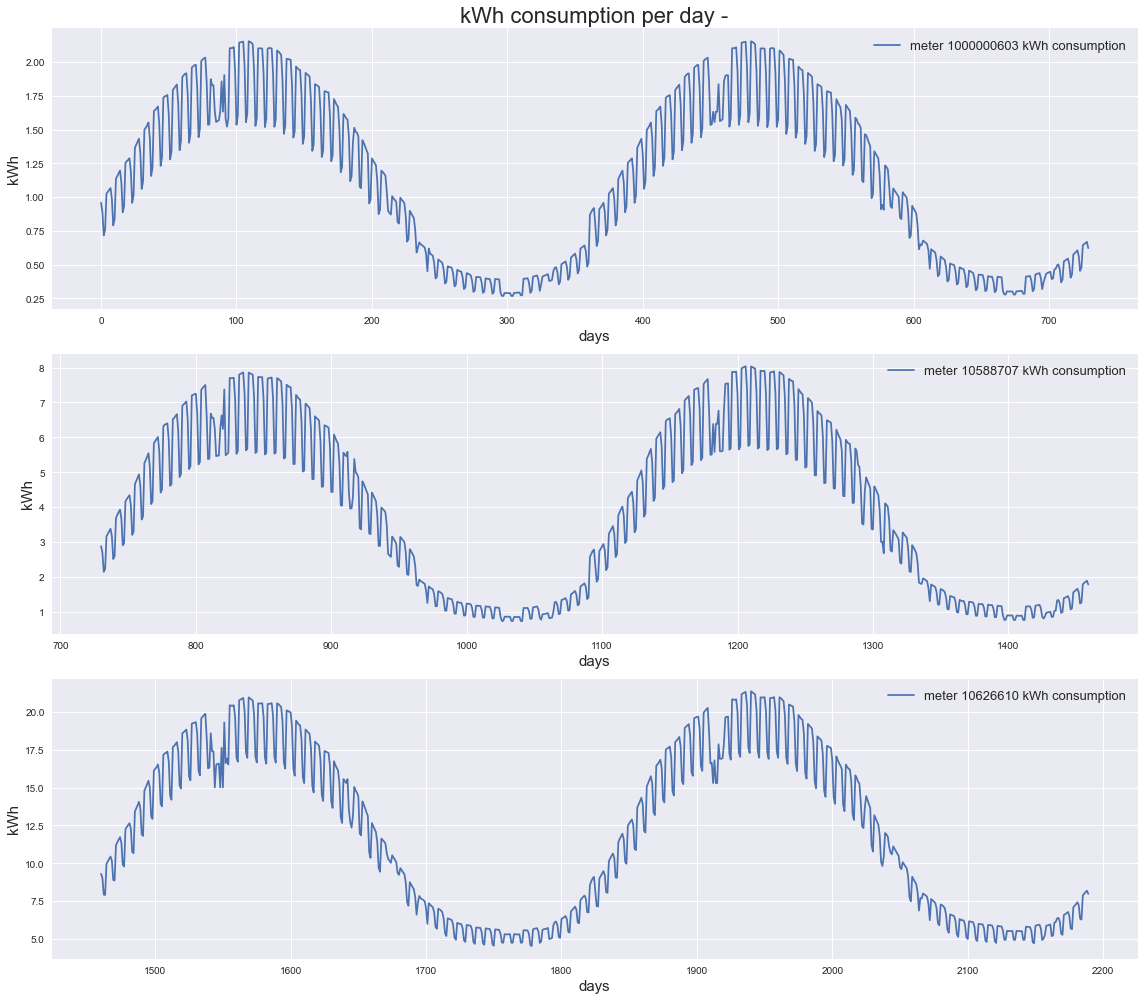

In [34]:
fig , (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=(16,14))
axes = [ax1,ax2,ax3]
for i , meter in enumerate(df4['Meter ID'].unique()):
    new_df = df4[df4['Meter ID'] == meter]['Cost']
    new_df.reset_index()
    axes[i].plot(new_df,label = f'meter {meter} kWh consumption')
    axes[i].set_xlabel('days')
    axes[i].set_ylabel('kWh')
    axes[i].xaxis.label.set_size('15')
    axes[i].yaxis.label.set_size('15')
    if i==0: 
        axes[i].set_title('kWh consumption per day -')
        axes[i].title.set_size('22')
    axes[i].legend(loc=0,prop={'size':13})
fig.tight_layout()

In [35]:
total_cost_df = df4[['Meter ID','Cost(£)','kWh']].groupby('Meter ID').sum()
total_cost_df.round(2)

,Cost(£),kWh
Meter ID,,
10588707,28.50,122450.0
10626610,88.24,303558.0
1000000603,8.27,24674.0


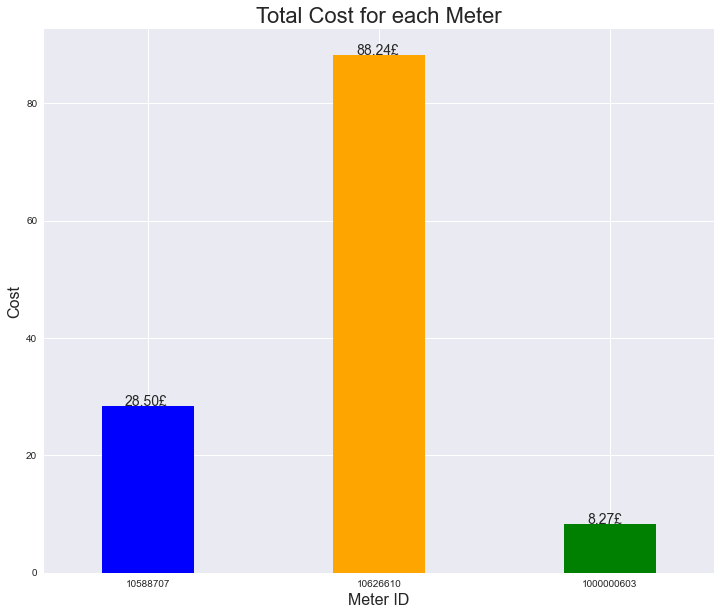

In [36]:
ax = total_cost_df['Cost(£)'].plot.bar(figsize=(12,10),width=0.4,color=['blue','orange','green'])
for i , patch in enumerate(ax.patches):
    ax.text(patch.get_x() + patch.get_width()/4,
            total_cost_df['Cost(£)'].iloc[i],
            '{:1.2f}£'.format(total_cost_df['Cost(£)'].iloc[i]),
            size = '14'
           )
ax.set_title('Total Cost for each Meter')
ax.set_xlabel('Meter ID')
ax.set_ylabel('Cost')
ax.title.set_size('22')
ax.xaxis.label.set_size('16')
ax.yaxis.label.set_size('16')
ax.tick_params(axis='x',rotation=0)

### Task 2
#### Function which generates a list of random meters of any size

In [37]:
import timeit
import datetime

In [38]:
exit_zones = df3['Exit Zone'].unique()
exit_zones

array(['EA1', 'EA2', 'EA3', 'EA4', 'EM1', 'EM2', 'EM3', 'EM4', 'LC', 'LO',
       'LS', 'LT', 'LW', 'NE1', 'NE2', 'NE3', 'NO1', 'NO2', 'NT1', 'NT2',
       'NT3', 'NW1', 'NW2', 'SC1', 'SC2', 'SC4', 'SE1', 'SE2', 'SO1',
       'SO2', 'SW1', 'SW2', 'SW3', 'WA1', 'WA2', 'WM1', 'WM2', 'WM3'],
      dtype=object)

In [39]:
def generate_meters(size):
    """Generates an array of meter lists, exit zones and Annual Quantities (kWh)."""
    exit_zones = ['EA1', 'EA2', 'EA3', 'EA4', 'EM1', 'EM2', 'EM3', 'EM4', 'LC', 'LO',
       'LS', 'LT', 'LW', 'NE1', 'NE2', 'NE3', 'NO1', 'NO2', 'NT1', 'NT2',
       'NT3', 'NW1', 'NW2', 'SC1', 'SC2', 'SC4', 'SE1', 'SE2', 'SO1',
       'SO2', 'SW1', 'SW2', 'SW3', 'WA1', 'WA2', 'WM1', 'WM2', 'WM3']
    ids = np.random.randint(low=11111111,high=111111111,size=(size,1))
    exits = np.random.choice(exit_zones,size=(size,1))
    AQ = np.random.randint(1111,111111,size=(size,1))
    return np.hstack([ids,exits,AQ])

meters = generate_meters(15)
meters

array([['73010824', 'SC4', '7107'],
       ['51167866', 'SW3', '59508'],
       ['25061860', 'WM1', '24637'],
       ['59097716', 'NT2', '31138'],
       ['81535349', 'EA3', '61522'],
       ['78262168', 'NE1', '103230'],
       ['23836656', 'NT3', '44400'],
       ['51316799', 'SO1', '18977'],
       ['101769816', 'NE1', '1211'],
       ['99208550', 'SW2', '28837'],
       ['104499815', 'NE1', '27597'],
       ['70227375', 'LT', '63237'],
       ['70608194', 'SC2', '94631'],
       ['17240044', 'WM3', '68127'],
       ['90539536', 'NE3', '107484']], dtype='<U11')

### Task 3
##### Function that generates mock consumption data given a list of meters, start and end date

In [40]:
def generate_consumption_data(meters,start_date,end_date):
    """Returns mock consumption data between two given dates for a list of meters."""
    consumption_data = np.zeros(shape=(1,3))
    dates = pd.date_range(start_date,end_date,freq='D').to_pydatetime()
    #dates = np.array(list(map(lambda x:x.strftime('%Y-%m-%d'),dates)))
    days = len(dates)
    for meter in meters:
        meter_id_data = np.full((days,1),meter[0])
        dates = dates.reshape((days,1))
        kwh = np.random.random(size=(days,1))*int(meter[-1])/float(days)
        total = np.hstack([dates,meter_id_data,kwh])
        consumption_data = np.vstack([consumption_data,total])
    return consumption_data[1:]
                           
generate_consumption_data(meters,'2020-5-15','2020-9-17')

array([[datetime.datetime(2020, 5, 15, 0, 0), '73010824',
        29.166481458663615],
       [datetime.datetime(2020, 5, 16, 0, 0), '73010824',
        7.376332566945126],
       [datetime.datetime(2020, 5, 17, 0, 0), '73010824',
        47.48427561893594],
       ...,
       [datetime.datetime(2020, 9, 15, 0, 0), '90539536',
        542.3642679109988],
       [datetime.datetime(2020, 9, 16, 0, 0), '90539536',
        715.208564915591],
       [datetime.datetime(2020, 9, 17, 0, 0), '90539536',
        102.32650088232965]], dtype=object)

In [41]:
start_date , end_date = df1['Date'].min() , df1['Date'].max()
print(start_date , end_date)

2020-10-01 00:00:00 2022-09-30 00:00:00


### Task 4
##### Function which takes as an input a meter list and a consumption table and returns the Transporation cost table

In [42]:
def fetch_rate(x,rate_df):
    """Returns the corresponding rate (p/kWh) of a Meter ID/Exit Zone on a given day."""
    if float(x[-1]) < 73200.0: ##AQ MIN INCLUDED & AQ MAX EXCLUDED
        new_df = rate_df.loc[(rate_df['Exit Zone'] == x[1]) & 
                             (rate_df['AQ(MIN)'] == 0.0) & 
                             (rate_df['Date'] <= x[0])]
    else:
        new_df = rate_df.loc[(rate_df['Exit Zone'] == x[1]) & 
                             (rate_df['AQ(MIN)'] == 73200.0) &
                             (rate_df['Date'] <= x[0])]
    return new_df['Rate (p/kWh)'].iloc[-1]

In [43]:
def calculate_transportation_cost(meters,consumption_table,rates_df):
    """Returns a dataframe which assigns to a list of meters the corresponding
       total kWh consumption and total cost over a period of time, by adding 
       the daily consumption/costs."""
    meter_df = pd.DataFrame(data = meters, columns = ["Meter ID","Exit Zone","AQ (kWh)"])
    consumption_df = pd.DataFrame(data = consumption_table , columns = ["Date","Meter ID","kWh"])
    merged = pd.merge(consumption_df,meter_df)
    merged['Rate (p/kWh)'] = merged[['Date','Exit Zone','AQ (kWh)']].apply(lambda x:
                                                                           fetch_rate(x,rates_df)
                                                                           ,axis=1)
    merged['Cost'] = merged['Rate (p/kWh)']*merged['kWh']
    transportation_cost = merged[['Meter ID','Cost','kWh']].groupby('Meter ID').sum()
    return transportation_cost

meters = generate_meters(10)
consumption_table = generate_consumption_data(meters,start_date,end_date)
calculate_transportation_cost(meters,consumption_table,df3)                       

,Cost,kWh
Meter ID,,
25433122,1035.259337,44114.225858
26789406,1254.186312,41845.496521
32209071,1357.563356,45316.732998
32948736,1142.247782,48620.400098
39656400,1221.377764,41791.483477
57238792,1224.631617,36082.084769
64775069,184.683121,5542.498471
71280939,1231.541986,40858.907413
90989975,745.909412,25240.849409


In [44]:
tik = time.perf_counter()
meters = generate_meters(3)
consumption_table = generate_consumption_data(meters,start_date,end_date)
calculate_transportation_cost(meters,consumption_table,df3)      
tak = time.perf_counter()
print('Process completed in {:1.3f} second(s)'.format(round(tak-tik,3)))

Process completed in 1.949 second(s)


##### Benchmarking

In [45]:
rate_df = df3
rate_df.head()

,index,Date,Exit Zone,AQ(MIN),AQ(MAX),Rate (p/kWh)
0,0,2020-04-01,EA1,0,73200.0,0.0287
1,1,2020-04-01,EA2,0,73200.0,0.0287
2,2,2020-04-01,EA3,0,73200.0,0.0287
3,3,2020-04-01,EA4,0,73200.0,0.0287
4,4,2020-04-01,EM1,0,73200.0,0.0287


In [46]:
from typing import Dict

In [47]:
def benchmark(inputs,iterations:int=10) -> Dict[int,float]:
    work = inputs[0]
    rate_df = inputs[1]
    start_date , end_date = inputs[2] , inputs[3]
    durations = {}
    for size in work:
        avg = 0
        for _ in range(iterations):
            tik = time.perf_counter()
            meter_list = generate_meters(size)
            mock_consumption_data = generate_consumption_data(
                                                     meter_list,
                                                     start_date,
                                                     end_date)
            calculate_transportation_cost(meter_list, mock_consumption_data,rate_df)
            tak = time.perf_counter()
            avg += tak - tik
        durations.update({size:avg/float(iterations)})
    return durations

In [48]:
start_date , end_date = df4['Date'].iloc[10] , df4['Date'].loc[40]
print(start_date , end_date)

2020-10-11 00:00:00 2020-11-10 00:00:00


In [49]:
inputs = [[i for i in range(1,15,1)],rate_df,start_date, end_date]
sim_results = benchmark(inputs,100)

In [50]:
sim_results

{1: 0.035144621000000154,
 2: 0.05963443899999994,
 3: 0.082572349,
 4: 0.1081187359999997,
 5: 0.1323189910000004,
 6: 0.15849484600000005,
 7: 0.18131730599999968,
 8: 0.20423350700000115,
 9: 0.2291333900000012,
 10: 0.2571337460000004,
 11: 0.27613334799999817,
 12: 0.304607347000001,
 13: 0.34417188300000107,
 14: 0.3564644090000027}

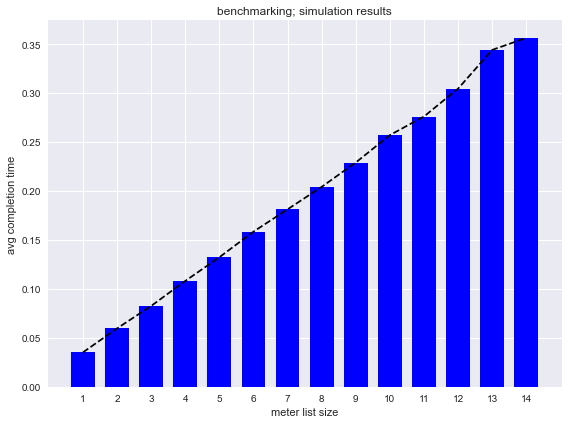

In [51]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.bar(sim_results.keys(),sim_results.values(),width=0.7,color='blue',alpha=1)
xs = [patch.get_x() + patch.get_width()/2 for patch in ax.patches]
ys = [patch.get_height() for patch in ax.patches]
ax.plot(xs,ys,linestyle='--',color='black',zorder=2)
ax.set_xlabel('meter list size')
ax.set_ylabel('avg completion time')
ax.set_title('benchmarking; simulation results')
ax.set_xticks(list(sim_results.keys()))
fig.tight_layout()

##### Task 5
##### Benchmarking observations

The above data suggest that as the meter list size increases so does increase the computational effort, i.e. the average time required for the process to finish. Furthermore, there seems to be diminishing returns (negative curvature) between the list size and computational time. Moreover, the same holds for the number of days in the forecast table. As the number of days increase so does the average time required for the function to finish. For the 3 meters of the initial problem and the two-year period, we note that the process required 1.7 seconds, on average, to be completed.

There are a number of ways to improve the performance of the calculation. For instance:
- By optimizing the algorithm. Taking shortcuts.
- By utilizing Python generators for memory performance.
- Using parallel programming, e.g. Python's multiprocessing module or concurrent.futures module. That way we may distribute the amount of work to different processors for various meter list sizes so that the calculation can be completed in shorter time interval.

In [54]:
###Using concurrent.futures module in Sublime to distribute the amount of work to different logical
###Processors. For instance:
# sizes = np.arange(1,os.cpu_count()+1,1)
# avg_durations = dict()
# processes = []

# with concurrent.futures.ProcessPoolExecutor() as executor:
#     for i in range(os.cpu_count()):
#         print('Registering process %d ...' % (i+1))
#         amount_of_work = [size for size in sizes if size%os.cpu_count() == i]
#         processes.append(executor.submit(benchmark,[amount_of_work,rate_df,start_date,end_date]))
    
#     for process in concurrent.futures.as_completed(processes):
#         result = process.result()
#         for key , value in result: avg_durations.update({key:value})
# avg_durations